# Project: Classification - Car Insurance Claims Prediction
Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the features that result in the best performing model so that they can better estimate consumer behavior and anticipate costs.

#Importing Libraries

In [ ]:
import pandas as pd
import requests
from io import StringIO

#importing libraries for data manipulation
import pandas as pd
import numpy as np

#importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for running the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, make_scorer

#Importing data

In [ ]:
#Structure: Total rows: 10,000 , Total columns: 18 (including target variable outcome).​
#Feature Types:​Numeric: age, income, credit_score, annual_mileage.​Categorical: gender, vehicle_type, education.​
#Binary: marital_status, vehicle_year (converted).​
orig_url="https://drive.google.com/file/d/1IQxIaEkLINBuWiV5GrfrYnD7VfkFQQp9/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


# Project Exploratory Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [ ]:
data.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


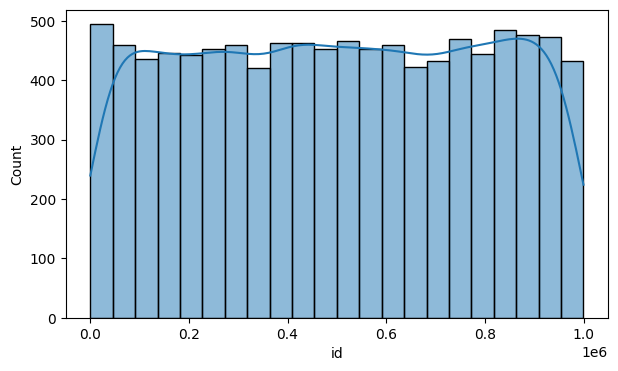

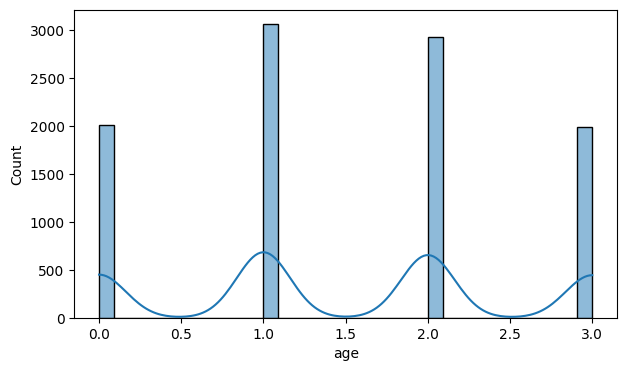

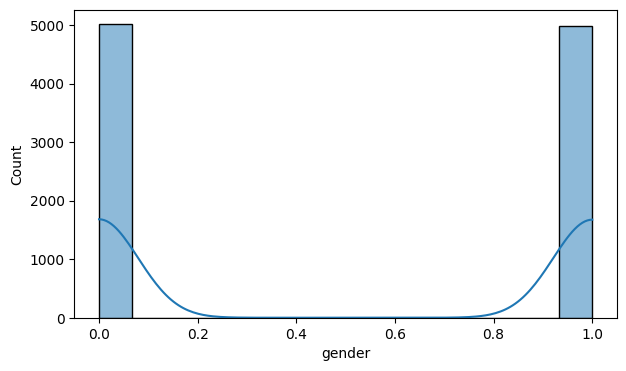

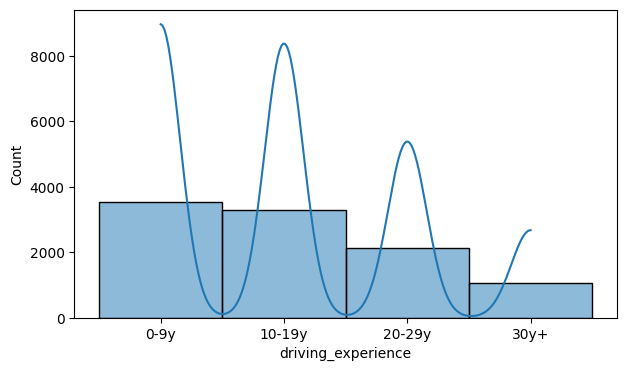

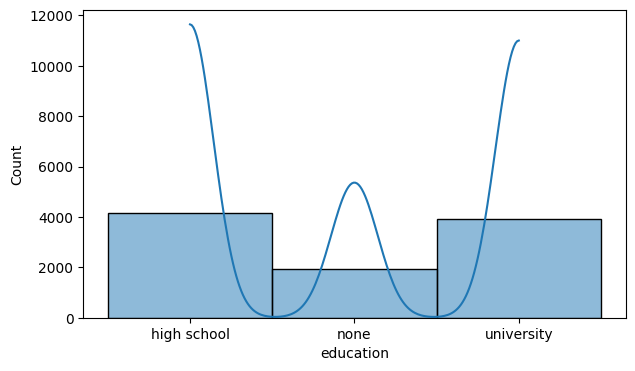

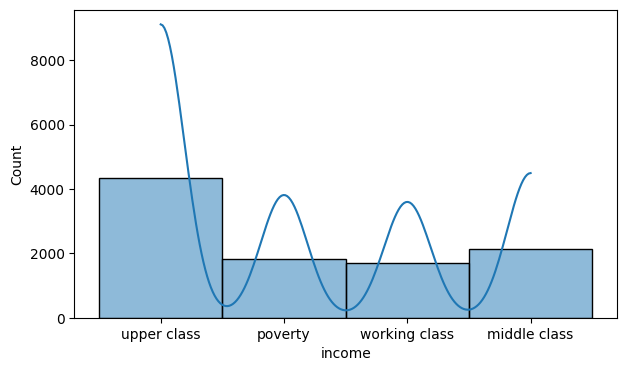

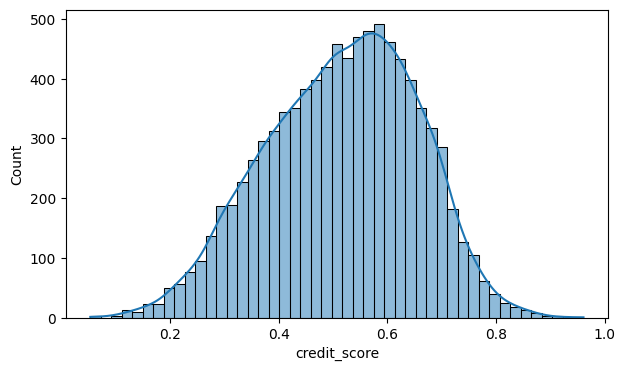

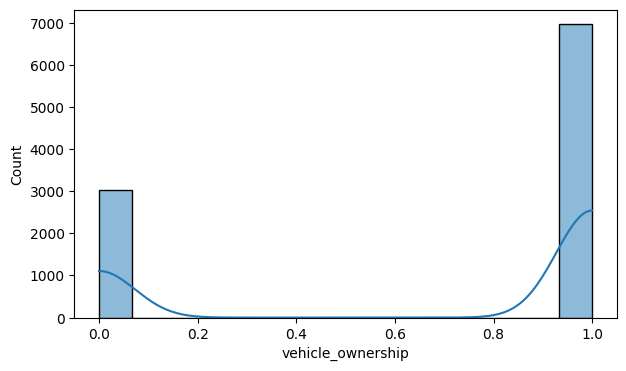

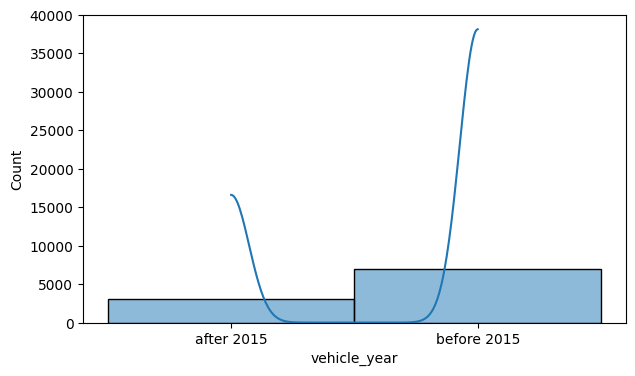

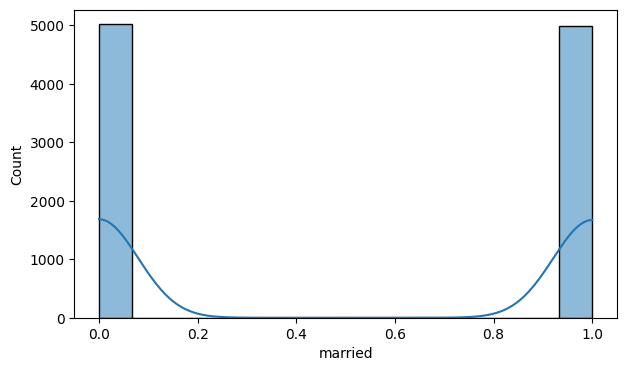

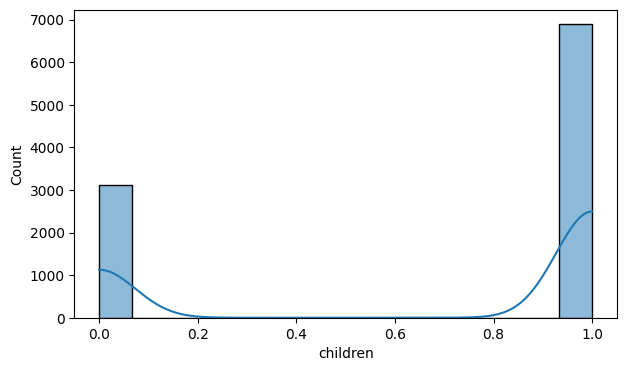

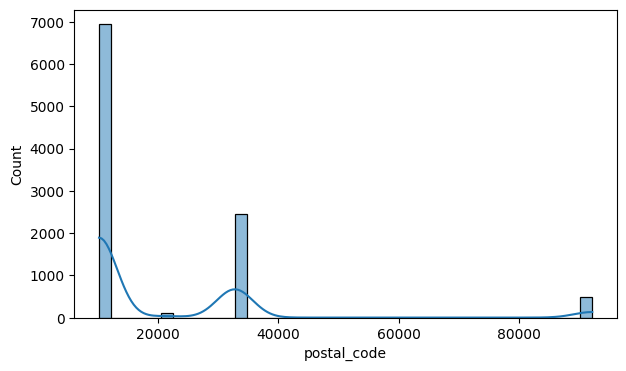

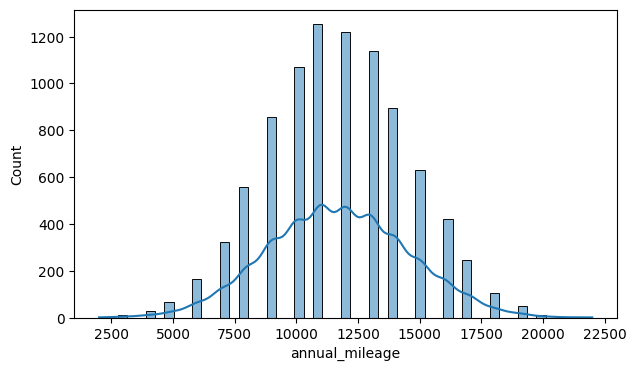

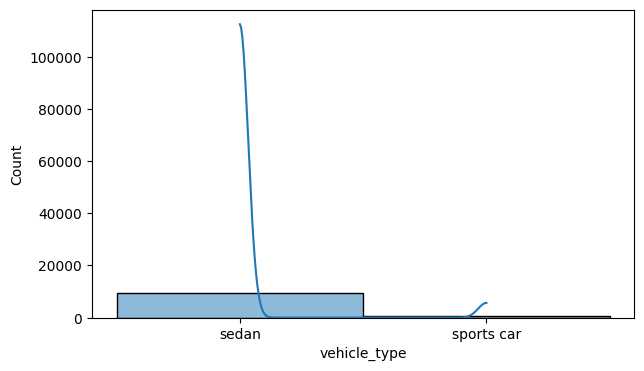

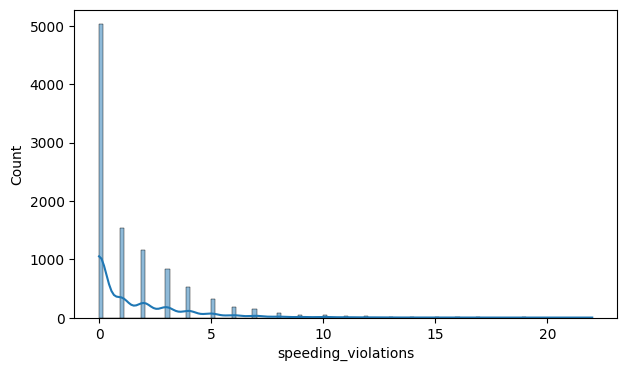

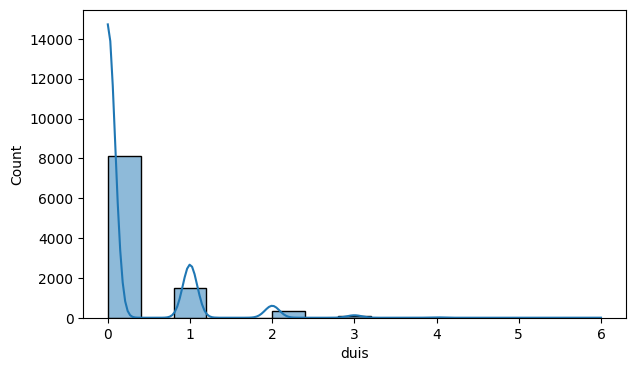

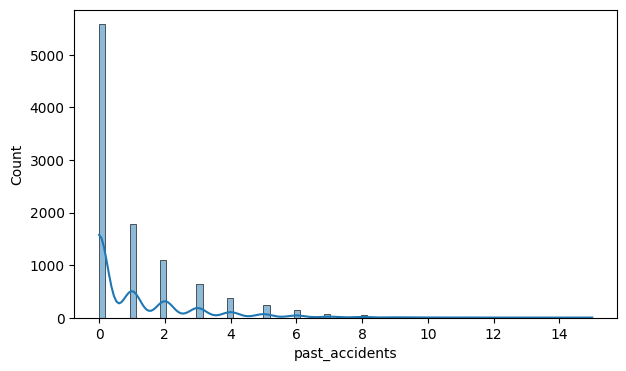

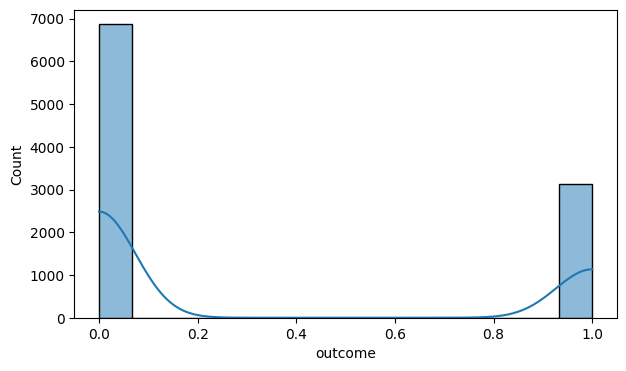

In [ ]:
for i in data.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(data=data, x = i, kde = True)
    plt.show()

# Project Pre-processing



Missing Data Handling

In [ ]:
data['credit_score'].fillna(data['credit_score'].mean(), inplace=True)
data['annual_mileage'].fillna(data['annual_mileage'].mean(),inplace=True)
#To address the missing values in credit score and annual mileage, we imputed the missing data using the mean of each respective feature.

<ipython-input-72-3dc4e3925e59>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['credit_score'].fillna(data['credit_score'].mean(), inplace=True)
<ipython-input-72-3dc4e3925e59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Converting Categorical Data

In [ ]:
ordinal_mapping_experience = {'0-9y': 1, '10-19y': 2, '20-29y': 3, '30y+': 4}  # converting map ordinal categories to numbers
ordinal_mapping_education = {'none': 0, 'high school': 1, 'university': 2, 'postgraduate': 3}
ordinal_mapping_income = {'poverty': 0, 'working class': 1, 'middle class': 2, 'upper class': 3}
data['driving_experience'] = data['driving_experience'].map(ordinal_mapping_experience)
data['education'] = data['education'].map(ordinal_mapping_education)
data['income'] = data['income'].map(ordinal_mapping_income)

In [ ]:
data = pd.get_dummies(data, columns=['vehicle_year', 'vehicle_type'], drop_first=True) #Converting nominal categorical variables to dummy variables

In [ ]:
binary_mapping_vehicle = {False: 0, True: 1}
data['vehicle_year_before 2015'] = data['vehicle_year_before 2015'].map(binary_mapping_vehicle)
data['vehicle_type_sports car'] = data['vehicle_type_sports car'].map(binary_mapping_vehicle)

In [ ]:
data.describe()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome,vehicle_year_before 2015,vehicle_type_sports car
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,2.069300,1.20130,1.899600,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300,0.696700,0.047700
std,290030.768758,1.025278,0.500024,0.990452,0.73745,1.149109,0.130752,0.459578,0.500022,0.463008,18915.613855,2680.167384,2.241966,0.55499,1.652454,0.463858,0.459707,0.213141
min,101.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,1.000000,1.00000,1.000000,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,2.000000,1.00000,2.000000,0.515813,1.000000,0.000000,1.000000,10238.000000,11697.003207,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,753974.500000,2.000000,1.000000,3.000000,2.00000,3.000000,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000,1.000000,0.000000
max,999976.000000,3.000000,1.000000,4.000000,2.00000,3.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000,1.000000,1.000000


2. Feature Engineering

In [ ]:
data['violations_accidents'] = data['speeding_violations'] + data['past_accidents'] # Creating a new feature by combining 'speeding_violations' and 'past_accidents'
data.drop(columns = ['speeding_violations','past_accidents'], inplace = True)

3. Correlation Analysis

In [ ]:
data_corr = data.drop(columns=['id','gender','driving_experience','education','income','vehicle_ownership','vehicle_year_before 2015','married','postal_code','vehicle_type_sports car','outcome'], inplace=False)
#removing columns with categorical inputs.

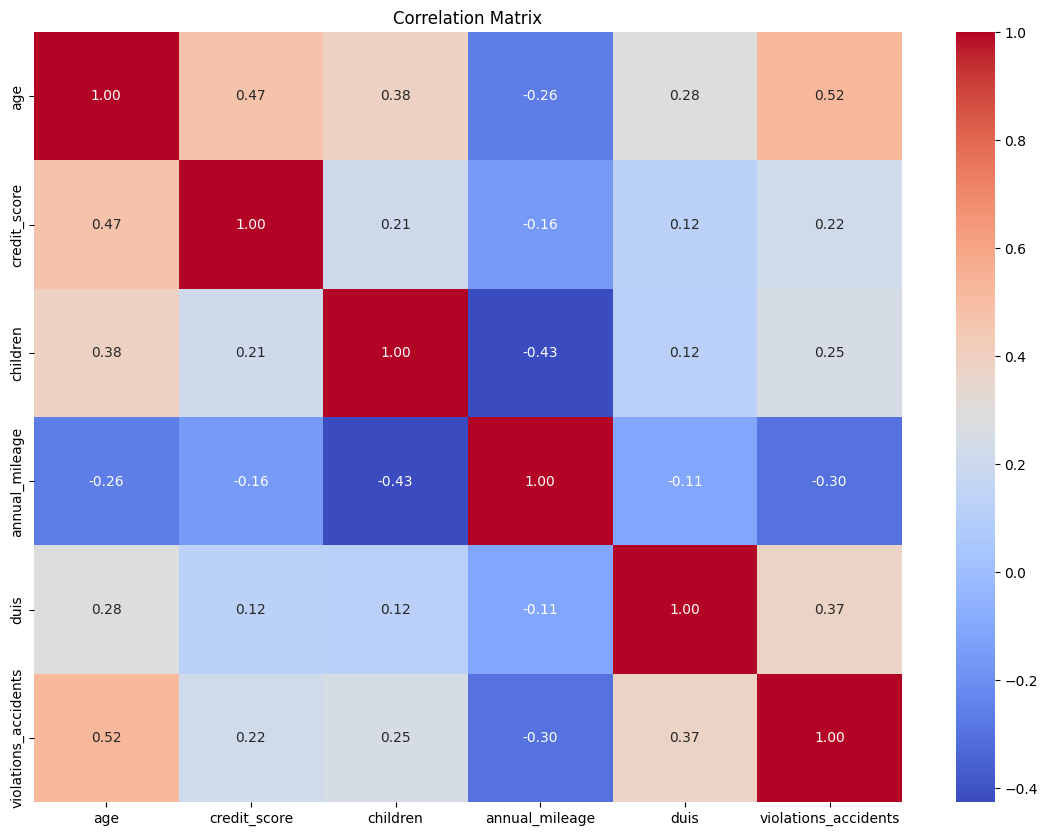

In [ ]:
correlation_matrix = data_corr.corr() #Creating a correlation matrix to identify highly correlated features
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#dropping features with high correlation
threshold = 0.9
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)
data.drop(columns=correlated_features, inplace=True)

set()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10000 non-null  int64  
 1   age                       10000 non-null  int64  
 2   gender                    10000 non-null  int64  
 3   driving_experience        10000 non-null  int64  
 4   education                 10000 non-null  int64  
 5   income                    10000 non-null  int64  
 6   credit_score              10000 non-null  float64
 7   vehicle_ownership         10000 non-null  float64
 8   married                   10000 non-null  float64
 9   children                  10000 non-null  float64
 10  postal_code               10000 non-null  int64  
 11  annual_mileage            10000 non-null  float64
 12  duis                      10000 non-null  int64  
 13  outcome                   10000 non-null  float64
 14  vehicle

4. Removing Unnecessary Variables

In [ ]:
data.drop(columns=['id', 'postal_code'], inplace=True)

# Project Model Fit and Initial Evaluation

Split the Data into Training and Testing Sets

In [ ]:
X = data[predictors]
y = data[target_variable]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'predictors'

Define the metrics_score() Function

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Claimed', 'Claimed'], yticklabels=['Not Claimed', 'Claimed'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Instantiate and Train the Model

In [ ]:
# Instantiate the model #Using a Random Forest classifier as the model
model = RandomForestClassifier(n_estimators = 150, max_depth =5, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

Generate Predictions and Evaluate the Model

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1367
         1.0       0.79      0.63      0.70       633

    accuracy                           0.83      2000
   macro avg       0.82      0.78      0.79      2000
weighted avg       0.83      0.83      0.82      2000



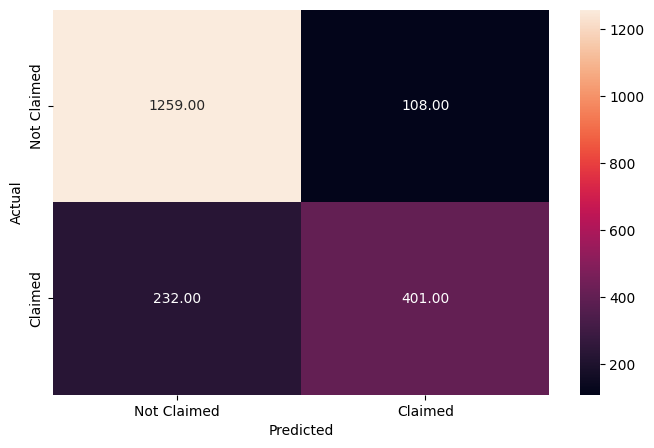

None


In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using metrics_score
performance_metrics = metrics_score(y_test, y_pred)
print(performance_metrics)

Examine Feature Importance

In [ ]:
# Extract and display feature importances from the trained model
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

credit_score                0.211334
annual_mileage              0.122646
driving_experience          0.120360
violations_accidents        0.101561
age                         0.096646
vehicle_ownership           0.086517
income                      0.060552
vehicle_year_before 2015    0.056060
education                   0.038087
gender                      0.032071
married                     0.025126
children                    0.022105
duis                        0.016085
vehicle_type_sports car     0.010850
dtype: float64


In [ ]:
#trying Decision Tree Classifier

# Instantiate the model #Using a Random Forest classifier as the model
model2 = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      2500

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



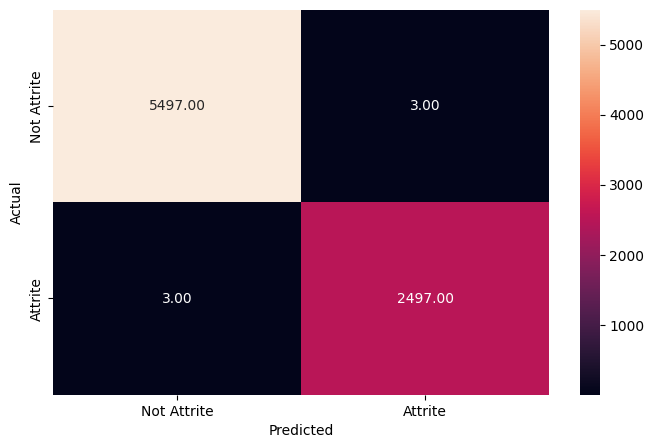

In [ ]:
#checking model performace of training data
y_pred_train_model2 = model2.predict(X_train)
metrics_score(y_train, y_pred_train_model2)

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      1367
         1.0       0.64      0.63      0.64       633

    accuracy                           0.77      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.77      0.77      0.77      2000



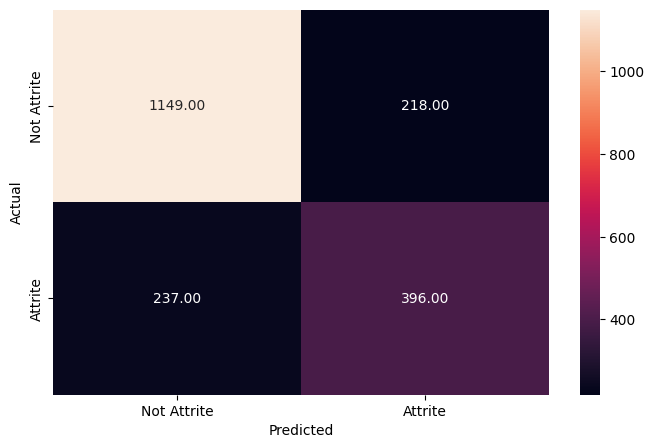

In [ ]:
#checking model performace of test data
y_pred_test_model2 = model2.predict(X_test)
metrics_score(y_test, y_pred_test_model2)
#The model achieves moderate accuracy (77%) but shows signs of class imbalance:​
#Precision and recall for "Attrite" (Class 1) are significantly lower than for "Not Attrite" (Class 0).​
#False Negatives (237) suggest that the model struggles to identify all cases of attrition, a critical issue in some use cases.​

In [ ]:
#Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
lg = LogisticRegression()
# Fit the model to the training data
lg.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1367
         1.0       0.78      0.71      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000



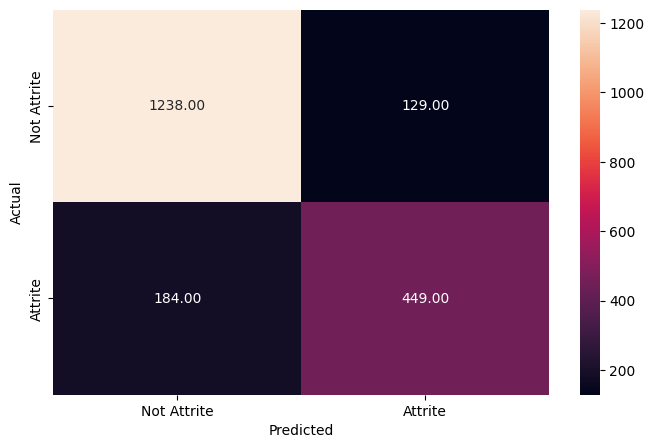

In [ ]:
#checking model performace of test data
y_pred_test_lg = lg.predict(X_test)
metrics_score(y_test, y_pred_test_lg)
#The model achieves high recall (91%) and high precision (87%) for the "Not Claimed" class.​
#Compared to prior models, this logistic regression model performs better for the "Claimed" class, achieving a 71% recall and a 74% F1-score.​
#The weighted averages across metrics indicate strong general performance.​

# Tuning the model - using Ensemble Method

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr = 0.5
gb_model = GradientBoostingClassifier(learning_rate=lr)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5)

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1367
         1.0       0.75      0.68      0.71       633

    accuracy                           0.83      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.82      0.83      0.82      2000



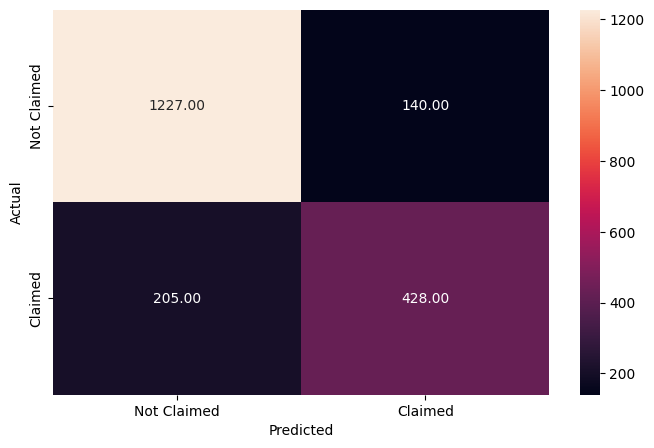

In [ ]:
y_test_pred_gb = gb_model.predict(X_test)
metrics_score(y_test, y_test_pred_gb)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regression model
rf_model = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


NameError: name 'y_train_pred_best_rf' is not defined

# Model Performance and Observations

In [ ]:
# Instantiate the model #Using a Random Forest classifier as the model
model = RandomForestClassifier(n_estimators = 200, max_depth =10, min_samples_leaf =2, min_samples_split = 5)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1367
         1.0       0.76      0.70      0.73       633

    accuracy                           0.83      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.83      0.83      0.83      2000



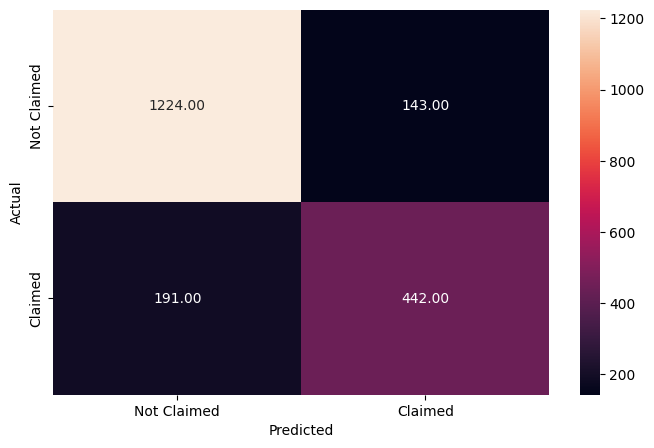

None


In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using metrics_score
performance_metrics = metrics_score(y_test, y_pred)
print(performance_metrics)
#The model achieves low recall (63%) and moderate precision (79%) for the "Claimed" class.​
#Lower recall (63%) for the "Claimed" class indicates the model is missing some true "Claimed" instances.​
#Overall Accuracy: A strong 83% accuracy​